In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 333kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670921 sha256=20ee53a42e19d630ce3ec466ee060461093061a5cd2bd575e05df4ce87a8d950
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


### **Importing libraries**

In [ ]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse,mae
from surprise.model_selection import cross_validate

## Importing data

In [ ]:
df = pd.read_csv('sample_data/movie_recommendation_system/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Dropping timestamp because we won't be using it

In [ ]:
df.drop('timestamp', axis = 1, inplace = True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# Checking missing values

In [ ]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

# Exploratory Data Analysis(EDA)

In [ ]:
n_movies = df["movieId"].nunique()
n_users = df["userId"].nunique()
print(f'Number of uique movies: {n_movies}')
print(f'Number of uique users: {n_users}')

Number of uique movies: 9724
Number of uique users: 610


# Sparsity of our data
Sparsity(%) = ((Missing Values) / (Total Values)) * 100

In [ ]:
available_ratings = df['rating'].count()
total_ratings = n_movies * n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings / total_ratings) * 100
print(f'Sparsity: {sparsity}')

Sparsity: 98.30003169443864


# Ratings Distribution

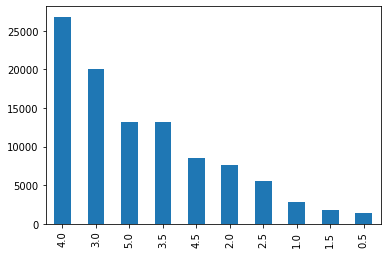

In [ ]:
df['rating'].value_counts().plot(kind = 'bar')

# Dimensionality Reduction

Filter movies with less than 3 ratings

In [ ]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

Filter users with less than 3 movies rated

In [ ]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

Remove rarely rated movies and rarely rating users

In [ ]:
print(f'Old Shape: {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New Shape: {df.shape}')

Old Shape: (100836, 3)
New Shape: (92394, 3)


# Create training and test sets

Columns used for training

In [ ]:
cols = ['userId','movieId','rating']

Create surprise dataset

In [ ]:
reader = Reader(rating_scale =  (0.5,5))
data = Dataset.load_from_df(df[cols],reader)

Create train set and prediction set

In [ ]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

# Creating a model
Singular Value Decomposition(SVD) and Interaction Matrix

In [ ]:
algo = SVD(n_epochs = 25, verbose = True)

Training the model

In [ ]:
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
print(">>>>Training Done")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

# **Predictions**
Predict ratings for all pairs (users, movies) that are not in training set

In [ ]:
predictions = algo.test(antiset)
#Print first prediction
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

Recommending top 3 movies based on predictions

In [ ]:
from collections import defaultdict

def get_top_n(predictions,n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid,est))

  for uid,user_ratings in top_n.items():
    user_ratings.sort(key = lambda x : x[1], reverse = True)
    top_n[uid] = user_ratings[:n]
  return top_n
  pass

top_n = get_top_n(predictions, n = 3)
for uid, user_ratings in top_n.items():
  print(uid, [ iid for (iid, rating) in user_ratings])

1 [318, 48516, 58559]
2 [1204, 1217, 1945]
3 [1104, 4011, 750]
4 [1270, 1204, 3030]
5 [1204, 1213, 4993]
6 [3451, 1225, 5690]
7 [318, 1235, 1214]
8 [1172, 1198, 1213]
9 [1250, 1213, 1193]
10 [260, 3030, 2300]
11 [1204, 527, 58559]
12 [1197, 1206, 2761]
13 [296, 1204, 50]
14 [3435, 1213, 898]
15 [608, 1221, 475]
16 [2324, 3275, 106782]
17 [3030, 1250, 3451]
18 [1235, 750, 1225]
19 [1213, 1080, 5618]
20 [1197, 296, 1250]
21 [1204, 898, 6796]
22 [1197, 1206, 1213]
23 [356, 1204, 2324]
24 [904, 912, 1250]
25 [318, 475, 912]
26 [1204, 2019, 6104]
27 [904, 2160, 5690]
28 [1283, 4973, 2788]
29 [898, 7361, 27773]
30 [1197, 1213, 2959]
31 [858, 910, 475]
32 [1204, 2959, 2692]
33 [2300, 912, 3949]
34 [1198, 3508, 4011]
35 [912, 750, 1204]
36 [741, 1089, 1204]
37 [1204, 898, 27773]
38 [5747, 2959, 1193]
39 [1235, 318, 112552]
40 [899, 1198, 1235]
41 [8784, 1104, 3147]
42 [1225, 25, 1208]
43 [260, 593, 608]
44 [1222, 296, 1276]
45 [2019, 6711, 898]
46 [3451, 898, 4642]
47 [527, 1104, 898]
48 [3030